# Prequires

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from timeit import default_timer as timer
# from google.colab import drive
# from google.colab.patches import cv2_imshow
import cv2 #print img

from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

CLASS_NUMBER = 5
DATA_PATH = "./data/"
MODEL_PATH = "./models/"
LOG_PATH = "./logs/"

-----------------------------

# Traffic sign detection

## I. Read Dataset

In [20]:
with open(DATA_PATH + 'data_5_class.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

# # Preparing y_train and y_validation for using in Keras
data['y_train'] = to_categorical(data['y_train'], num_classes=CLASS_NUMBER)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=CLASS_NUMBER)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

## II. Setup

In [21]:
filters = [5]
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

start_dense = 10
end_dense = 100
step_dense = 10

# for model_count, value in enumerate(range(300, 500, 10), 1):
#     print(model_count, value, end=" - ")
# print(model_count)
model_count = round((end_dense - start_dense) / step_dense)

model = [0] * len(filters) * model_count
h = [0] * len(model)

print("model_count: ",model_count)

# %%capture cap
# with open('output.txt', 'w') as log:
#     log.write(cap.stdout)

model_count:  9


## III. Init models

**Option1:** Based on dense

In [22]:
i = 0
for runDense in range(start_dense, end_dense, step_dense):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[0], padding='same', activation='relu', input_shape=(32, 32, 1)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(runDense, activation='relu'))
    model[i].add(Dense(CLASS_NUMBER, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    i = i + 1

## IV. Train model

In [23]:
for i in range(len(h)):
    print("Model " + str(step_dense*i + start_dense))
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=1)  
    print("\n")                          
    
    print('Model with filters {0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
        format(start_dense + 10*i, epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Model 10
Epoch 1/5
2023/2023 [==============================] - 25s 12ms/step - loss: 0.4500 - accuracy: 0.8958 - val_loss: 0.2054 - val_accuracy: 0.9792 - lr: 7.7378e-04
Epoch 2/5
2023/2023 [==============================] - 23s 11ms/step - loss: 0.1291 - accuracy: 0.9847 - val_loss: 0.0919 - val_accuracy: 0.9875 - lr: 7.3509e-04
Epoch 3/5
2023/2023 [==============================] - 23s 11ms/step - loss: 0.0658 - accuracy: 0.9890 - val_loss: 0.0748 - val_accuracy: 0.9917 - lr: 6.9834e-04
Epoch 4/5
2023/2023 [==============================] - 9s 4ms/step - loss: 0.0372 - accuracy: 0.9948 - val_loss: 0.0403 - val_accuracy: 0.9896 - lr: 6.6342e-04
Epoch 5/5
2023/2023 [==============================] - 11s 5ms/step - loss: 0.0227 - accuracy: 0.9963 - val_loss: 0.0626 - val_accuracy: 0.9833 - lr: 6.3025e-04


Model with filters 10, epochs=5, training accuracy=0.99634, validation accuracy=0.99167
Model 20
Epoch 1/5
2023/2023 [==============================] - 9s 4ms/step - loss: 0.1271 - a

Check quality of test dataset [optional]

In [24]:
for i in range(len(model)):
    start_timer = timer()
    temp = model[i].predict(data['x_test'])
    end_timer = timer()
    
    temp = np.argmax(temp, axis=1)
    delta_time = end_timer - start_timer

    # We compare predicted class with correct class for all input images
    # And calculating mean value among all values of following numpy array
    # By saying 'testing_accuracy == data['y_test']' we create numpy array with True and False values
    # 'np.mean' function will return average of the array elements
    # The average is taken over the flattened array by default
    avg_accuracy = np.mean(temp == data['y_test'])
    avg_time = delta_time / len(data['x_test'])
    
    print('MODEL {0:d}: testing accuracy = {1:.5f}, with classification time = {2:.5f}'.format(step_dense*i + start_dense, avg_accuracy, avg_time)) #TÚ

43/43 [==============================] - 0s 2ms/step
MODEL 10: testing accuracy = 0.98148, with classification time = 0.00071
43/43 [==============================] - 0s 2ms/step
MODEL 20: testing accuracy = 0.99481, with classification time = 0.00019
43/43 [==============================] - 0s 2ms/step
MODEL 30: testing accuracy = 0.99259, with classification time = 0.00014
43/43 [==============================] - 0s 2ms/step
MODEL 40: testing accuracy = 0.99185, with classification time = 0.00016
43/43 [==============================] - 0s 2ms/step
MODEL 50: testing accuracy = 0.98667, with classification time = 0.00015
43/43 [==============================] - 0s 2ms/step
MODEL 60: testing accuracy = 0.99704, with classification time = 0.00014
43/43 [==============================] - 0s 2ms/step
MODEL 70: testing accuracy = 0.98444, with classification time = 0.00014
43/43 [==============================] - 0s 2ms/step
MODEL 80: testing accuracy = 0.99481, with classification time = 

## V. Save model

In [25]:
saving_path = "./models/"

for i in range(len(model)):
    print(i, end=" ")
    name = 'model-' + str(step_dense*i + start_dense) + '.h5'
    model[i].save(MODEL_PATH + name)

# Saving model locally without committing
from IPython.display import FileLink

# FileLink('model-5x5.h5')

0 1 2 3 4 5 6 7 8 

-------------------------------------

# Utils

## I. Convert 43 classes -> 5 classes

In [2]:
# label for 15 classes
# labels = np.array([[35, 0], [37, 1], [36, 2], [17, 3], [30, 4], 
#             [3, 5], [39, 6], [38, 7], [27, 8], [15, 9], 
#             [25, 10], [14, 11], [34, 12], [33, 13], [28, 14]])

# label for 5 classes
labels = np.array([[35, 0], [17, 1], [14, 2], [34, 3], [33, 4]])


def reassignLabels(inpLabel):
  global labels
  for index in range(len(inpLabel)):
    existLabel = False
    for check in range(len(labels)):
      if inpLabel[index] == labels[check][0]:
        inpLabel[index] = labels[check][1]
        existLabel = True
        break
    if(existLabel == False):
      inpLabel[index] = 100
  return inpLabel

def filterData(inpLabel, inpData):
  copyImg = np.empty(shape=(0, 1, 32, 32))
  copyLabel = np.empty(shape=(0))
  for index in range(len(inpLabel)):
    if index % 10000 == 0:
      print(index)
    if inpLabel[index] != 100:
      copyImg = np.append(copyImg, [inpData[index]], axis=0)      
      copyLabel = np.append(copyLabel, [inpLabel[index]], axis=0)      
  return copyLabel, copyImg

# Opening file for reading in binary mode
with open(DATA_PATH + 'data8.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

print("org dataset 43 classes")
print("lenght-train: ", len(data['y_train']))
print("lenght-validation: ", len(data['y_validation']))
print("lenght-test: ", len(data['y_test']))

data['y_train'], data['x_train'] = filterData(reassignLabels(data['y_train']), data['x_train'])
data['y_validation'], data['x_validation'] = filterData(reassignLabels(data['y_validation']), data['x_validation'])
data['y_test'], data['x_test'] = filterData(reassignLabels(data['y_test']), data['x_test'])

with open(DATA_PATH + 'data_5_class.pickle', 'wb') as f:
    pickle.dump(data, f)


print("new dataset 5 classes")
print("lenght-train: ", len(data['y_train']))
print("lenght-validation: ", len(data['y_validation']))
print("lenght-test: ", len(data['y_test']))

org dataset 43 classes
lenght-train:  86989
lenght-validation:  4410
lenght-test:  12630
0
10000
20000
30000
40000
50000
60000
70000
80000
0
0
10000
new dataset 5 classes
lenght-train:  10115
lenght-validation:  480
lenght-test:  1350


## II. Show images from pickle

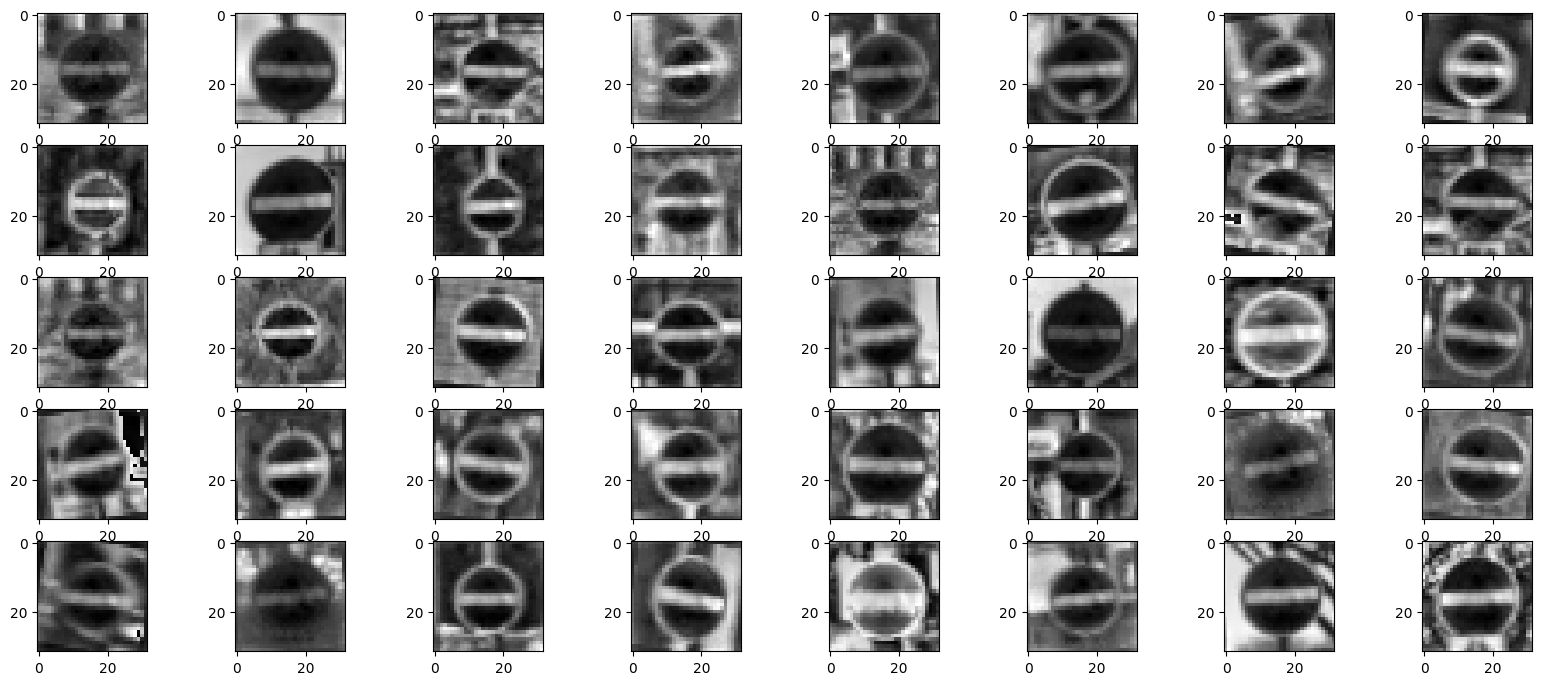

In [18]:
with open(DATA_PATH + 'data_5_class.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

# Setup the way images being showed
import matplotlib.pyplot as plt
def show_images(images, figsize=(20,10), columns = 8):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(int(len(images) / columns) + 1, columns, i + 1)
      plt.imshow(image, cmap='gray')

from PIL import Image
count = 0;
arr = []
for i in range(0, len(data['y_train'])):
    # if(data['y_train'][i] >= 0 and data['y_train'][i] <= 2):
    if(data['y_train'][i] == 1):
        count = count + 1
        image = data['x_train'][i].reshape(32, 32)
        arr.append(image)
        # plt.imshow(image, cmap='gray')
        # plt.show()
    if(count == 40):
        break

show_images(arr)

## II. Inspect model

In [3]:
my_model = load_model(MODEL_PATH + "model-150.h5")
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 150)               1228950   
                                                                 
 dense_11 (Dense)            (None, 5)                 755       
                                                                 
Total params: 1,230,537
Trainable params: 1,230,537
Non-trainable params: 0
____________________________________________

## II. Calculate time computing

In [33]:
my_model = load_model(MODEL_PATH + "model-370.h5");

with open(DATA_PATH + 'data_5_class.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type


accu_list = []
time_list = []

for i in range(len(data['x_test'])):
    start_time = timer();
    prediction = my_model.predict(data['x_test'][i].reshape(1, 32, 32, 1))
    end_time = timer();
    
    class_predicted = np.argmax(prediction)
    probability = np.amax(prediction)
    isCorrect = (class_predicted == data['y_test'][i])
    
    if isCorrect:
        print("[ ] Predict: ", class_predicted, " with probability: ", probability, " in: " + str(end_time - start_time))
    else:
        print("[X] Predict: ", class_predicted, " with probability: ", probability)
        
    print("    Actual ans: ", data['y_test'][i])
    print()
    
    accu_list.append(isCorrect)
    time_list.append(end_time - start_time)

accu_list = np.array(accu_list)
time_list = np.array(time_list)

print("===============================")
print("The average accuracy: ", np.mean(accu_list))
print("The average time: ", np.mean(time_list))

1/1 [==============================] - 0s 78ms/step
[ ] Predict:  2  with probability:  1.0  in: 0.15057270000397693
    Actual ans:  2.0

1/1 [==============================] - 0s 32ms/step
[ ] Predict:  1  with probability:  1.0  in: 0.0885264999960782
    Actual ans:  1.0

1/1 [==============================] - 0s 26ms/step
[ ] Predict:  1  with probability:  1.0  in: 0.06777619999775197
    Actual ans:  1.0

1/1 [==============================] - 0s 28ms/step
[ ] Predict:  0  with probability:  1.0  in: 0.07074799999827519
    Actual ans:  0.0

1/1 [==============================] - 0s 27ms/step
[ ] Predict:  4  with probability:  1.0  in: 0.07467479999468196
    Actual ans:  4.0

1/1 [==============================] - 0s 31ms/step
[ ] Predict:  4  with probability:  1.0  in: 0.07569399999920279
    Actual ans:  4.0

1/1 [==============================] - 0s 28ms/step
[ ] Predict:  1  with probability:  1.0  in: 0.0791556999902241
    Actual ans:  1.0

1/1 [========================

## II.Temp

In [35]:
# print(len(data['x_test']))

tf.config.list_physical_devices('GPU')
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

with tf.Session() as sess:
    devices = sess.list_devices()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1
